In [2]:
import numpy as np
import pandas as pd
import glob
import os
import time 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [3]:
# Shape of each representation
npy_paths_clmr = sorted(glob.glob('features_our/clmr/*.npy'))
npy_paths_musicnn = sorted(glob.glob('features_our/musicnn/*.npy'))
npy_paths_jukebox_zeropad = sorted(glob.glob('features_our/jukebox/*.npy'))

# Feature representations
X_clmr = np.array([np.load(p) for p in npy_paths_clmr])
X_musicnn = np.array([np.load(p) for p in npy_paths_musicnn])
X_jukebox_zeropad = np.array([np.load(p) for p in npy_paths_jukebox_zeropad])

# Labels
y_clmr = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_clmr])
y_musicnn = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_musicnn])
y_jukebox_zeropad = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_jukebox_zeropad])

In [27]:
def tsne_run(n_components,X,y):
    df = pd.DataFrame(data=X)
    rndperm = np.random.permutation(X.shape[0])
    df["label"] = y
    # Separating out the features
    x = df[df.columns[:-1]].values
    # Separating out the target
    y = df.loc[:,['label']].values
    
    if n_components == 2:
        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(x)
        
        # Scatter plot
        N = df.shape[0]
        df_subset = df.loc[rndperm[:N],:].copy()

        df_subset['tsne-2d-one'] = tsne_results[:,0]
        df_subset['tsne-2d-two'] = tsne_results[:,1]
        plt.figure(figsize=(16,10))
        sns.scatterplot(
            x="tsne-2d-one", y="tsne-2d-two",
            hue = "label",
            palette=sns.color_palette("hls", 10),
            data=df_subset,
            legend="full",
            alpha=1.0
        )

        plt.show()

## TSNE

## Clmr

/share/apps/anaconda-ci/fgci-centos7-anaconda/software/anaconda/2021-04-tf2/8ea88952/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/share/apps/anaconda-ci/fgci-centos7-anaconda/software/anaconda/2021-04-tf2/8ea88952/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12291 samples in 0.009s...
[t-SNE] Computed neighbors for 12291 samples in 5.807s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12291
[t-SNE] Computed conditional probabilities for sample 2000 / 12291
[t-SNE] Computed conditional probabilities for sample 3000 / 12291
[t-SNE] Computed conditional probabilities for sample 4000 / 12291
[t-SNE] Computed conditional probabilities for sample 5000 / 12291
[t-SNE] Computed conditional probabilities for sample 6000 / 12291
[t-SNE] Computed conditional probabilities for sample 7000 / 12291
[t-SNE] Computed conditional probabilities for sample 8000 / 12291
[t-SNE] Computed conditional probabilities for sample 9000 / 12291
[t-SNE] Computed conditional probabilities for sample 10000 / 12291
[t-SNE] Computed conditional probabilities for sample 11000 / 12291
[t-SNE] Computed conditional probabilities for sample 12000 / 12291
[t-SNE] Computed conditional probabilities for sa

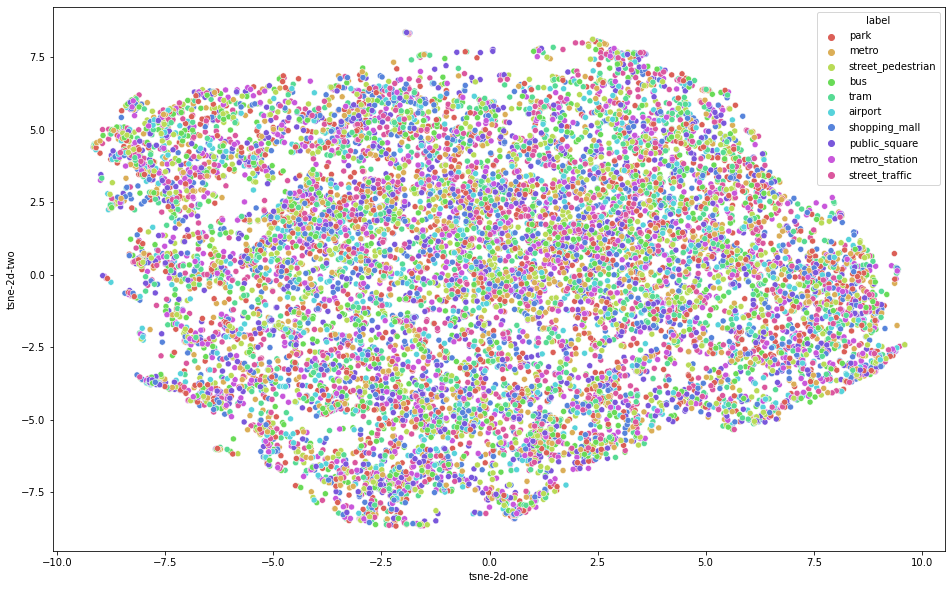

In [24]:
tsne_run(n_components=2, X_clmr, y_clmr)

## Musicnn

/share/apps/anaconda-ci/fgci-centos7-anaconda/software/anaconda/2021-04-tf2/8ea88952/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/share/apps/anaconda-ci/fgci-centos7-anaconda/software/anaconda/2021-04-tf2/8ea88952/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12291 samples in 0.050s...
[t-SNE] Computed neighbors for 12291 samples in 21.589s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12291
[t-SNE] Computed conditional probabilities for sample 2000 / 12291
[t-SNE] Computed conditional probabilities for sample 3000 / 12291
[t-SNE] Computed conditional probabilities for sample 4000 / 12291
[t-SNE] Computed conditional probabilities for sample 5000 / 12291
[t-SNE] Computed conditional probabilities for sample 6000 / 12291
[t-SNE] Computed conditional probabilities for sample 7000 / 12291
[t-SNE] Computed conditional probabilities for sample 8000 / 12291
[t-SNE] Computed conditional probabilities for sample 9000 / 12291
[t-SNE] Computed conditional probabilities for sample 10000 / 12291
[t-SNE] Computed conditional probabilities for sample 11000 / 12291
[t-SNE] Computed conditional probabilities for sample 12000 / 12291
[t-SNE] Computed conditional probabilities for s

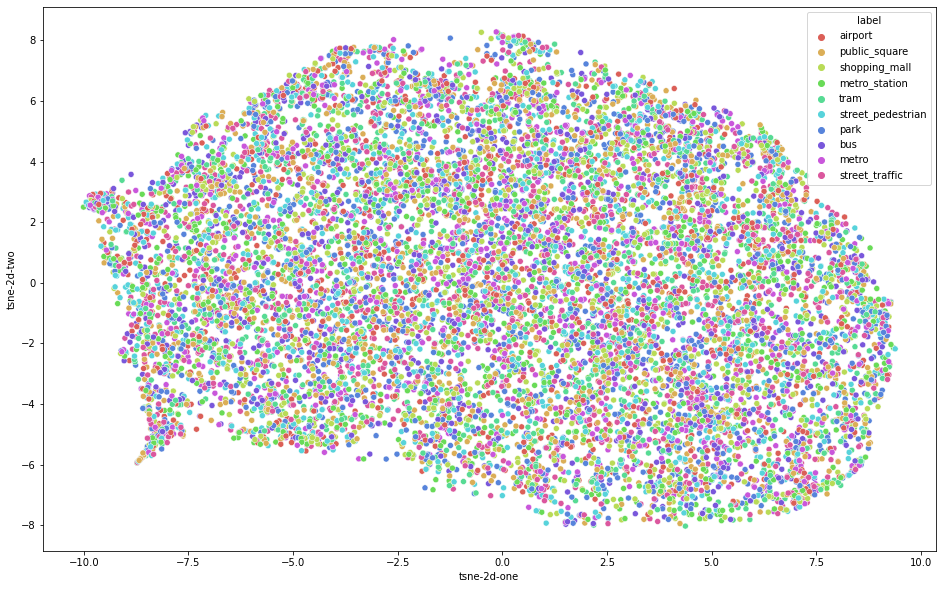

In [25]:
tsne_run(2, X_musicnn, y_musicnn)

## Jukebox (0-pad)

/share/apps/anaconda-ci/fgci-centos7-anaconda/software/anaconda/2021-04-tf2/8ea88952/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/share/apps/anaconda-ci/fgci-centos7-anaconda/software/anaconda/2021-04-tf2/8ea88952/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11588 samples in 0.054s...
[t-SNE] Computed neighbors for 11588 samples in 21.509s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11588
[t-SNE] Computed conditional probabilities for sample 2000 / 11588
[t-SNE] Computed conditional probabilities for sample 3000 / 11588
[t-SNE] Computed conditional probabilities for sample 4000 / 11588
[t-SNE] Computed conditional probabilities for sample 5000 / 11588
[t-SNE] Computed conditional probabilities for sample 6000 / 11588
[t-SNE] Computed conditional probabilities for sample 7000 / 11588
[t-SNE] Computed conditional probabilities for sample 8000 / 11588
[t-SNE] Computed conditional probabilities for sample 9000 / 11588
[t-SNE] Computed conditional probabilities for sample 10000 / 11588
[t-SNE] Computed conditional probabilities for sample 11000 / 11588
[t-SNE] Computed conditional probabilities for sample 11588 / 11588
[t-SNE] Mean sigma: 4.015678
[t-SNE] KL divergen

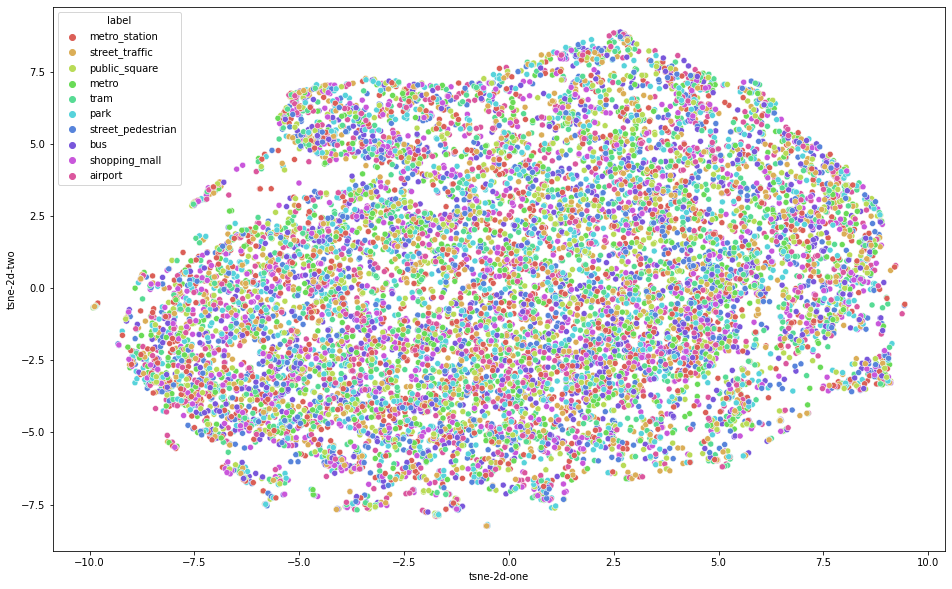

In [26]:
tsne_run(2, X_jukebox_zeropad, y_jukebox_zeropad)